### Imports

In [11]:
import os
import yaml
import sys
# Set project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Load config.yaml

In [12]:
#get config file
config_path = os.path.join(project_root, "config.yaml")

def load_config():
    if not os.path.exists(config_path):
        raise FileNotFoundError(f"ERROR: config.yaml not found at {config_path}")
    else:
        with open(config_path, "r") as file:
            config = yaml.safe_load(file)
    return config

# Test load
config = load_config()
print("Config loaded successfully!")

Config loaded successfully!


### Import `aggregated_data.csv` Dataset

In [13]:
READ_FOLDER_PATH = '../data/processed/'

df = pd.read_csv(READ_FOLDER_PATH+'aggregated_data.csv')

print(df.shape[0])
pd.set_option("display.max_colwidth", None) 
df

9074


,id_odsp,date,season,league,country,home_team,away_team,odd_h,odd_d,odd_a,...,home_sending_off_80_85,away_sending_off_80_85,home_fouls_80_85,away_fouls_80_85,home_corners_80_85,away_corners_80_85,home_corner_diff,away_corner_diff,corner_diff,target
0,UFot0hit/,2011-08-05,2012,D1,germany,Borussia Dortmund,Hamburg SV,1.56,4.41,7.42,...,0,0,1,2,0,0,0,1,1,1
1,Aw5DflLH/,2011-08-06,2012,D1,germany,FC Augsburg,SC Freiburg,2.36,3.60,3.40,...,0,0,1,1,1,0,1,1,2,1
2,CzPV312a/,2011-08-06,2012,F1,france,Paris Saint-Germain,Lorient,1.55,4.50,9.40,...,0,0,0,1,2,0,3,1,4,1
3,GUOdmtII/,2011-08-06,2012,F1,france,Caen,Valenciennes,2.50,3.40,3.45,...,0,0,1,1,0,0,1,3,4,1
4,M7PhlM2C/,2011-08-06,2012,F1,france,Brest,Evian Thonon Gaillard,2.29,3.25,3.85,...,0,0,0,0,2,0,3,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9069,vJy048Er/,2017-01-22,2017,I1,italy,Empoli,Udinese,2.90,3.18,2.96,...,0,0,0,0,0,0,1,0,1,1
9070,xAkY8l6R/,2017-01-22,2017,I1,italy,Genoa,Crotone,1.97,4.35,8.00,...,0,0,1,1,0,0,2,0,2,1
9071,xSU9scI9/,2017-01-22,2017,E0,england,Chelsea,Hull,1.19,8.50,20.00,...,0,0,0,0,1,0,1,0,1,1
9072,xY7uZwOI/,2017-01-22,2017,F1,france,AS Monaco,Lorient,1.32,6.24,11.50,...,0,0,0,1,0,0,0,0,0,0


### Select features from config

In [14]:
# Create final dataset using construct_features module
from feature_engineering.construct_features import prepare_final_dataframe

df_selected, context_features, selected_features, constructed_features, target_variables = prepare_final_dataframe(df)
df_selected.head()

,id_odsp,date,season,league,country,home_team,away_team,odd_h,odd_d,odd_a,...,home_urgency_to_attack,away_urgency_to_attack,home_momentum_to_attack,away_momentum_to_attack,attack_intensity,defensive_pressure,home_corner_diff,away_corner_diff,corner_diff,target
0,UFot0hit/,2011-08-05,2012,D1,germany,Borussia Dortmund,Hamburg SV,1.56,4.41,7.42,...,0.000,0.067,0.000,0.067,0,-2,0,1,1,1
1,Aw5DflLH/,2011-08-06,2012,D1,germany,FC Augsburg,SC Freiburg,2.36,3.60,3.40,...,0.424,0.000,-0.424,-0.000,0,-3,1,1,2,1
2,CzPV312a/,2011-08-06,2012,F1,france,Paris Saint-Germain,Lorient,1.55,4.50,9.40,...,0.645,0.000,1.935,-0.000,3,0,3,1,4,1
3,GUOdmtII/,2011-08-06,2012,F1,france,Caen,Valenciennes,2.50,3.40,3.45,...,0.000,0.290,0.000,0.000,0,-2,1,3,4,1
4,M7PhlM2C/,2011-08-06,2012,F1,france,Brest,Evian Thonon Gaillard,2.29,3.25,3.85,...,0.627,0.373,2.508,0.000,0,-1,3,1,4,1


### Plot correlation heatmap (for selected features)

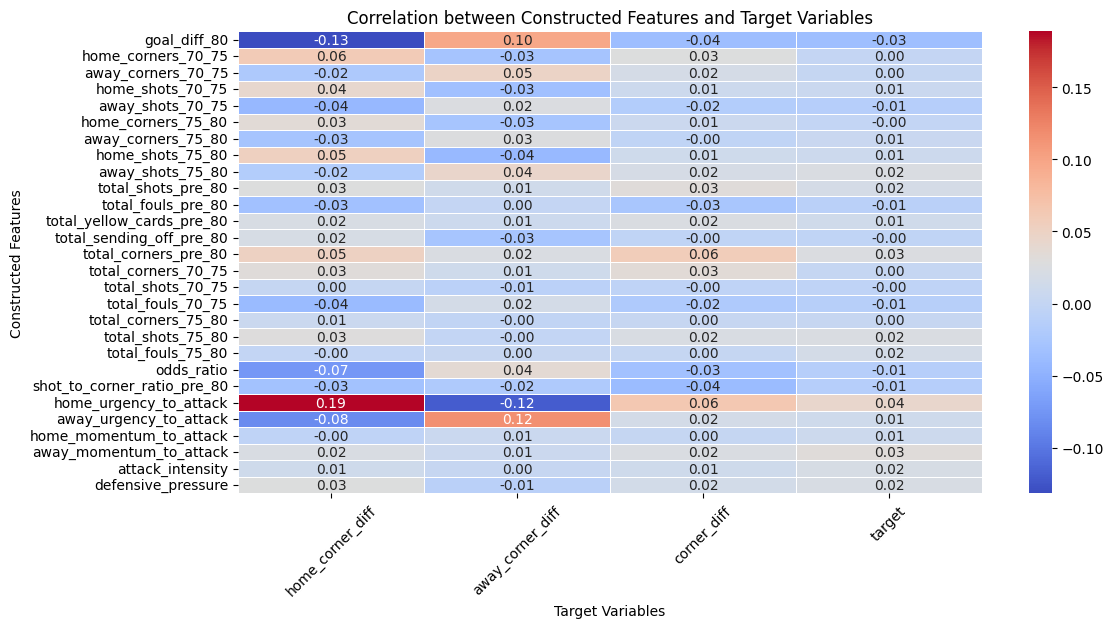

In [15]:
#Corelation matrix:
correlation_matrix = df_selected[selected_features + constructed_features + target_variables].corr()
correlation_with_target = correlation_matrix[target_variables].drop(target_variables, axis=0)

# Plot correlation heatmap:
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_with_target, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.xlabel("Target Variables")
plt.ylabel("Constructed Features")
plt.title("Correlation between Constructed Features and Target Variables")
plt.show()

## RF Model Fit (Train, Validate and Test)

- Split data to exclude the last 500 rows for testing
- Split further to: 80% train and 20% validation

In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#Only train on selected and constructed features
X=df_selected[selected_features + constructed_features]
y=df_selected["target"]

#Split data to exclude the last 500 rows for testing
train_data = df_selected.iloc[:-500]
test_data = df_selected.iloc[-500:]

# Split data -> train & validation
X_train, X_val, y_train, y_val = train_test_split(
    train_data[selected_features + constructed_features],
    train_data["target"],
    test_size=0.2,
    random_state=42,
    stratify=train_data["target"]
)

#Train our RandomForest model...
model = RandomForestClassifier(random_state=42, class_weight="balanced", n_estimators=100) #use balanced
model.fit(X_train, y_train)

# Predict on the validation set
y_pred_val = model.predict_proba(X_val)[:, 1]

y_pred_val

# # Feature importance
# feature_importances = pd.DataFrame({
#     'Feature': model.feature_names_in_,
#     'Importance': model.feature_importances_
# }).sort_values(by='Importance', ascending=False)

# print("\n### Feature Importance:\n")
# print(feature_importances.to_string(index=False))

array([0.88, 0.79, 0.66, ..., 0.77, 0.83, 0.69], shape=(1715,))

## Precision-Recall Optimisation via Threshold Adjustment

- Our aim is to increase Precision-Recall (more importantly precision), since we want to increase the likelihood of winning a 1+ corners at 80min bet -> prediciting the number of 1's correctly as important, i.e. when we do place a bet, we make sure we have a high chance of winning.
- Therefore, I performed threshold adjustament to try and maximise precision (but ensure recall is at least 10% to avoid precision=1)

In [17]:
from sklearn.metrics import precision_score, recall_score

#--- Threshold Maximisation ---
thresholds = np.linspace(0.5, 0.95, 20) #test thresholds from 0.5 to 0.95
results = []   
for t in thresholds:
    y_pred_t =(y_pred_val>=t).astype(int)
    precision_t= precision_score(y_val, y_pred_t)  
    recall_t= recall_score(y_val, y_pred_t)
    
    if recall_t>=0.1: #only take results where recall >= 0.1
        results.append((t, precision_t, recall_t))
 
#results as table
print("\n### Precision-Recall Tradeoff at Different Thresholds ###\n") 
print(f"{'Threshold':<12}{'Precision':<12}{'Recall':<12}") 
print("-"*36)  
for t, p, r in results:
    print(f"{t:<12.2f}{p:<12.4f}{r:<12.4f}")

##best threshold
best_threshold = max(results, key=lambda x: x[1])
optimal_threshold = round(best_threshold[0],3)
print("\n### Recommended Threshold for Maximum Precision ###")
print(f"Optimal Threshold: {optimal_threshold:.2f}")
print(f"Expected Precision: {best_threshold[1]:.4f}")
print(f"Expected Recall: {best_threshold[2]:.4f}")

# --- Model Evaluation ---
y_pred_threshold =(y_pred_val >= optimal_threshold).astype(int)

print(f"\n### Classification Report (threshold={optimal_threshold}):\n") 
print(classification_report(y_val, y_pred_threshold))


### Precision-Recall Tradeoff at Different Thresholds ###

Threshold   Precision   Recall      
------------------------------------
0.50        0.7608      0.9962      
0.52        0.7613      0.9916      
0.55        0.7615      0.9877      
0.57        0.7620      0.9731      
0.59        0.7645      0.9593      
0.62        0.7648      0.9432      
0.64        0.7627      0.9002      
0.67        0.7618      0.8665      
0.69        0.7642      0.8258      
0.71        0.7674      0.7345      
0.74        0.7639      0.6554      
0.76        0.7649      0.5019      
0.78        0.7870      0.4167      
0.81        0.7928      0.3231      
0.83        0.8013      0.1919      
0.86        0.8122      0.1128      

### Recommended Threshold for Maximum Precision ###
Optimal Threshold: 0.85
Expected Precision: 0.8122
Expected Recall: 0.1128

### Classification Report (threshold=0.855):

              precision    recall  f1-score   support

           0       0.25      0.92      0.39 

## Training RF Classifier for backtesting

- Test on final 500 rows (used to generate input csv for backtesting)
- Plot scatter graph to visualise our spread of predictions & how the threshold binarises them.


### Prediction on last 500 rows: ###
              precision    recall  f1-score   support

           0       0.24      0.91      0.38       118
           1       0.81      0.12      0.21       382

    accuracy                           0.31       500
   macro avg       0.52      0.51      0.30       500
weighted avg       0.67      0.31      0.25       500



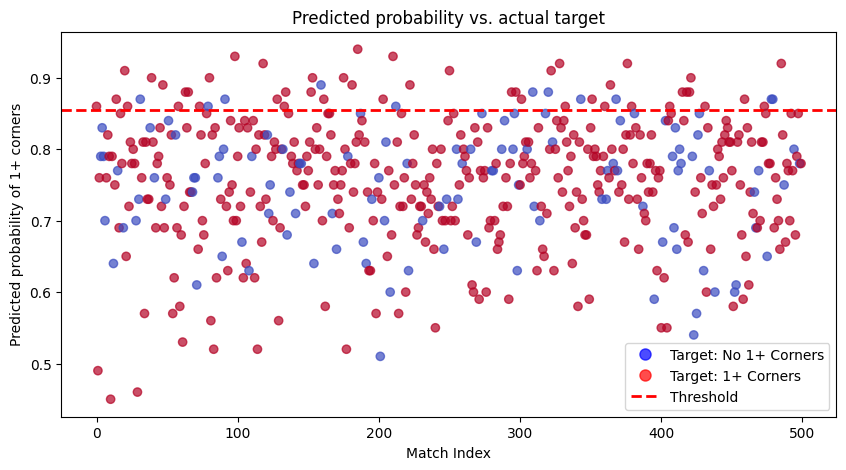

In [18]:
# --- Test on Last 500 Rows ---
X_test_final= test_data[selected_features+constructed_features]
y_test_final =test_data["target"]

# Predict on the final test data (last 500 rows)
y_probs_final =model.predict_proba(X_test_final)[:, 1]
y_pred_final=(y_probs_final >=optimal_threshold).astype(int)

#Evaluate on the last 500 rows (final simulation)
print("\n### Prediction on last 500 rows: ###")
print(classification_report(y_test_final, y_pred_final))

# Scatter plot: target vs predicted probabilities
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_probs_final)), y_probs_final,c=y_test_final,cmap='coolwarm',alpha=0.7,label='Predicted Probability')
plt.axhline(optimal_threshold, color='red', linestyle='dashed',linewidth=2,label=f'Threshold = {optimal_threshold:.2f}')
import matplotlib.lines as mlines
class_0 =mlines.Line2D([], [],color='blue',marker='o',linestyle='None', markersize=8, alpha=0.7, label='Target: No 1+ Corners')
class_1=mlines.Line2D([], [],color='red', marker='o',linestyle='None',markersize=8,alpha=0.7, label='Target: 1+ Corners')
plt.xlabel('Match Index')
plt.ylabel('Predicted probability of 1+ corners')
plt.title('Predicted probability vs. actual target')
plt.legend(handles=[class_0, class_1,plt.Line2D([], [],color='red',linestyle='dashed',linewidth=2,label='Threshold')])
plt.show()

## Feed data into CSV to be used for simulation
- Saves a csv with match_id, odds, model predictions, and actual results

In [19]:
results_df = pd.DataFrame({
    'kaggle_id': test_data['id_odsp'],
    'model_predicted_binary': y_pred_final,
    'actual_result': y_test_final
})
data_file = "../classification_predictions.csv"
results_df.to_csv(data_file, index=False)
print(f"Results saved to {data_file}")

Results saved to ../classification_predictions.csv
